In [1]:
import pandas as pd
import numpy as np

In [2]:
train_dataset_1 = pd.read_csv("./dataset/drugLibTrain_raw.tsv", sep="\t")
train_dataset_2 = pd.read_csv("./dataset/drugLibTest_raw.tsv", sep="\t")
train_dataset = train_dataset_1.append(train_dataset_2)
train_dataset

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


### Extraction of features
- We want to learn effectiveness of medicine using only benefits Reviews of medicine
- So our extracted dataset will have three columns
    - **benefitsSentiment** : which is the raw text provided by each user
    - **benefitsSentimentProcessed** : After processing our data (removing punctuation, lowercase)
    - **effectiveness** : target data, which we want to learn

In [3]:
benefitsReviewDatasetTraining = pd.DataFrame()
benefitsReviewDatasetTraining["benefitsSentiment"] = train_dataset["benefitsReview"]
benefitsReviewDatasetTraining["benefitsSentimentProcessed"] = train_dataset["benefitsReview"]
benefitsReviewDatasetTraining["effectiveness"] = train_dataset["effectiveness"]
benefitsReviewDatasetTraining

,benefitsSentiment,benefitsSentimentProcessed,effectiveness
0,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,Highly Effective
1,Although this type of birth control has more c...,Although this type of birth control has more c...,Highly Effective
2,I was used to having cramps so badly that they...,I was used to having cramps so badly that they...,Highly Effective
3,The acid reflux went away for a few months aft...,The acid reflux went away for a few months aft...,Marginally Effective
4,I think that the Lyrica was starting to help w...,I think that the Lyrica was starting to help w...,Marginally Effective
...,...,...,...
1031,Detoxing effect by pushing out the system thro...,Detoxing effect by pushing out the system thro...,Considerably Effective
1032,"The albuterol relieved the constriction, irrit...","The albuterol relieved the constriction, irrit...",Highly Effective
1033,Serve Acne has turned to middle,Serve Acne has turned to middle,Considerably Effective
1034,"My overall mood, sense of well being, energy l...","My overall mood, sense of well being, energy l...",Highly Effective


## Checking occurence of each class 
- This helps us checked whether the dataset is imbalanced

In [4]:
# checking to see the amount of each class
countOfField = pd.DataFrame(benefitsReviewDatasetTraining["effectiveness"].value_counts()).reset_index()
countOfField.columns = ["Effectiveness", "Count"] 
countOfField

,Effectiveness,Count
0,Highly Effective,1741
1,Considerably Effective,1238
2,Moderately Effective,572
3,Ineffective,329
4,Marginally Effective,263


### nltk package

In [5]:
import nltk
import re
nltk.download("punkt")
nltk.download("stopwords")
from nltk import word_tokenize
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Function to remove stop words, punctuation and converting text to lowercase

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. Examples include, the words like the, he, have etc.

In [6]:
def removeStopWordsAndPucntuation(text):
    tokenized_word = word_tokenize(text)
    filtered_word = " ".join([word for word in tokenized_word if word not in english_stop_words]) # stop words
    filtered_word = re.sub(r"[^a-zA-Z#]", " ", filtered_word) # removes punctuation
    return filtered_word.lower().strip()

In [7]:
stop_words_and_punctuation_removed = [removeStopWordsAndPucntuation(sentence) for sentence in benefitsReviewDatasetTraining["benefitsSentimentProcessed"]]
stop_words_and_punctuation_removed

['slowed progression left ventricular dysfunction overt heart failure alone agents managment hypertension mangagement congestive heart failur',
 'although type birth control cons pros   help cramps   it  s also effective prevention pregnancy     along use condoms well',
 'i used cramps badly would leave balled bed least   days   the ponstel n t take pain away completely   takes edge much normal activities possible   definitely miracle medication',
 'the acid reflux went away months days drug   the heartburn started soon i stopped taking   so i began treatment     months passed i stopped taking   the heartburn came back   seemed worse even   the doctor said i try another   month treatment   i   exact thing happened   this went three years   i asked n t curing reflux   the doctor quite frankly told n t cure      treatment symptoms      i told i would probably rest life',
 'i think lyrica starting help pain   side effects severe continue',
 'taking propecia year   starting    years age ha

## Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
def nltkTagToWordnetTag(NLTKtag):
    if NLTKtag.startswith('J'):
        return wordnet.ADJ
    elif NLTKtag.startswith('V'):
        return wordnet.VERB
    elif NLTKtag.startswith('N'):
        return wordnet.NOUN
    elif NLTKtag.startswith('R'):
        return wordnet.ADV
    else:
        return None;   

In [10]:
def lemmatizeText(text):
    nltkTag = nltk.pos_tag(word_tokenize(text))
    #returns tuple( token, word_net )
    wordNetTag = map(lambda item: (item[0], nltkTagToWordnetTag(item[1])), nltkTag )
    lemmatizedText = []
    for word, tag in wordNetTag:
        if tag is None:
            lemmatizedText.append(word)
        else:
            lemmatizedText.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatizedText)

In [11]:
lemmatizeText("harris mentioned that he would have cried") #example of lemmatization

'harris mention that he would have cry'

In [12]:
lemmatizedReviews = benefitsReviewDatasetTraining["benefitsSentimentProcessed"].apply(lambda text: lemmatizeText(text))
lemmatizedReviews

0       slow the progression of left ventricular dysfu...
1       Although this type of birth control have more ...
2       I be use to have cramp so badly that they woul...
3       The acid reflux go away for a few month after ...
4       I think that the Lyrica be start to help with ...
                              ...                        
1031    Detoxing effect by push out the system through...
1032    The albuterol relieve the constriction , irrit...
1033                       Serve Acne have turn to middle
1034    My overall mood , sense of well be , energy le...
1035    Up until 2 year ago , it work really well on a...
Name: benefitsSentimentProcessed, Length: 4143, dtype: object

### Combine Stop Words Removal and Text Lemmatization into One Function
- This promotes easy reuse of code

In [13]:
def processText(raw_text):
    stop_words_and_punctuation_removed_from_raw_text = removeStopWordsAndPucntuation(raw_text)
    lemmatizedRawText = lemmatizeText(stop_words_and_punctuation_removed_from_raw_text)
    lemmatizedRawText = " ".join([w for w in lemmatizedRawText.split() if len(w) > 2]) # removing words with less than 2 letters
    return lemmatizedRawText

In [14]:
processedTrainingText = benefitsReviewDatasetTraining["benefitsSentimentProcessed"].apply(lambda text: processText(text))
processedTrainingText

0       slow progression leave ventricular dysfunction...
1       although type birth control con pros help cram...
2       use cramp badly would leave ball bed least day...
3       the acid reflux away month day drug the heartb...
4       think lyrica start help pain side effect sever...
                              ...                        
1031    detox effect push system skin initially toxins...
1032    the albuterol relieve constriction irritation ...
1033                               serve acne turn middle
1034    overall mood sense well energy level increase ...
1035    year ago work really well scar past year irrit...
Name: benefitsSentimentProcessed, Length: 4143, dtype: object

In [15]:
benefitsReviewDatasetTraining["benefitsSentimentProcessed"] = processedTrainingText
benefitsReviewDatasetTraining.loc[1,:] #difference

,benefitsSentiment,benefitsSentimentProcessed,effectiveness
1,Although this type of birth control has more c...,although type birth control con pros help cram...,Highly Effective
1,Lamictal stabilized my serious mood swings. On...,lamictal stabilize serious mood swing one minu...,Highly Effective


## Plotting top 25 occuring words and a word cloud
- this shows us common words associated benefits reviews

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
from nltk import FreqDist

In [17]:
allWordsString = " ".join([text for text in benefitsReviewDatasetTraining["benefitsSentimentProcessed"]])
allWords = allWordsString.split()
wordDist = FreqDist(allWords)
wordDist

FreqDist({'take': 1530, 'the': 924, 'day': 867, 'pain': 803, 'help': 694, 'drug': 650, 'get': 599, 'effect': 574, 'time': 574, 'well': 563, ...})

In [18]:
wordsFrequency = pd.DataFrame({"word": list(wordDist.keys()), "count" : list(wordDist.values()) })
#top 25 occuring words
wordsFrequencySubsetedAndSorted = wordsFrequency.nlargest(columns="count", n = 25)
wordsFrequencySubsetedAndSorted.sort_values('count', inplace=True)

In [19]:
wordsFrequencySubsetedAndSorted.reset_index()

,index,word,count
0,226,week,421
1,56,start,421
2,514,able,448
3,60,treatment,475
4,32,would,476
5,98,benefit,479
6,76,year,488
7,216,skin,496
8,263,reduce,499
9,50,medication,505


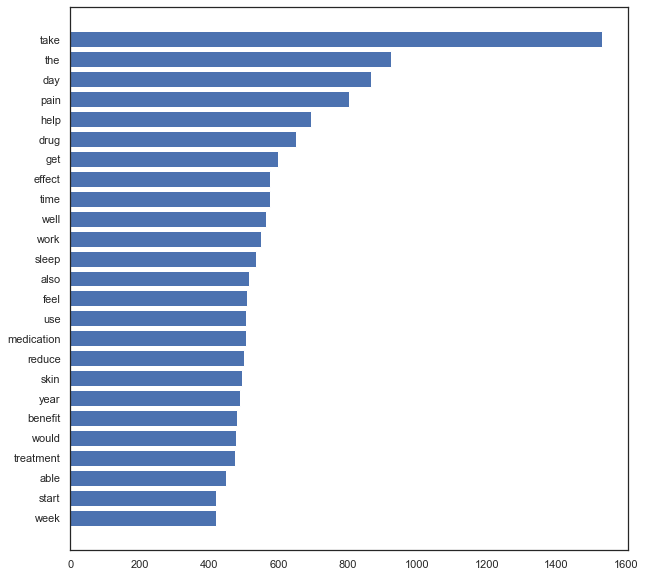

In [20]:
plt.figure(figsize=(10,10))
axis = plt.barh(wordsFrequencySubsetedAndSorted["word"], width= wordsFrequencySubsetedAndSorted["count"])
axis.ylabel = "count"
plt.show()

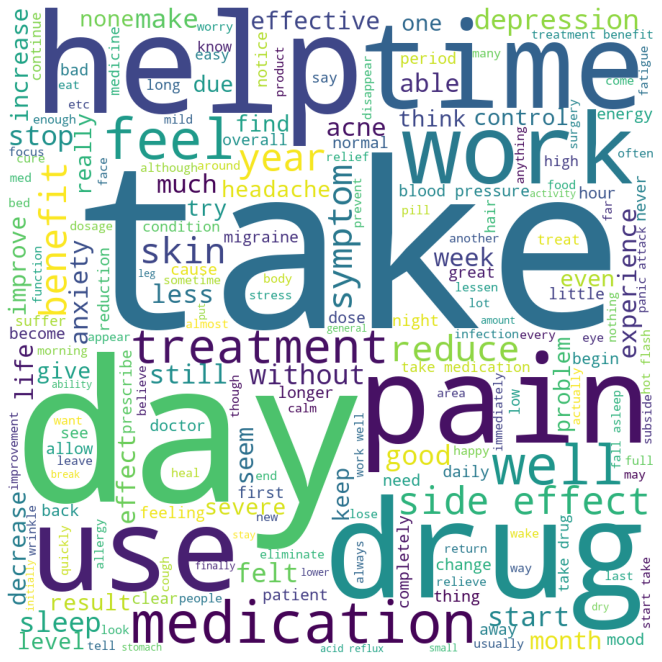

In [21]:
from wordcloud import WordCloud
cloud = WordCloud(width = 900, height = 900, background_color='white', min_font_size=12).generate(allWordsString)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(cloud)

## Next Steps is to Generate a Bag of Words Model

- Create A Sparse matrix of words corresponding to the reviews
- Split the data into training and validation sets

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# Creating a sparse matrix of top 1000 words w.r.t to our reviews
count_vectorizer = CountVectorizer(max_features=1000) 
X = count_vectorizer.fit_transform(benefitsReviewDatasetTraining["benefitsSentimentProcessed"]).toarray()
print("done")

done


In [26]:
X.shape # 3107 reviews, 3000 words 

(4143, 1000)

In [27]:
X # training input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
benefitsReviewDatasetTraining["effectiveness"] = benefitsReviewDatasetTraining["effectiveness"].astype('category')

In [62]:
Y = benefitsReviewDatasetTraining["effectiveness"].cat.codes # Target

In [63]:
Y.value_counts()

1    1741
0    1238
4     572
2     329
3     263
dtype: int64

In [64]:
benefitsReviewDatasetTraining["effectiveness"].value_counts()

Highly Effective          1741
Considerably Effective    1238
Moderately Effective       572
Ineffective                329
Marginally Effective       263
Name: effectiveness, dtype: int64

In [65]:
def convertToPosorNegPolarity(text):
    if text == "Ineffective":
        return "Negative"
    elif text == "Marginally Effective":
        return "Negative"
    else:
        return "Positive"

In [66]:
Y_BIN = benefitsReviewDatasetTraining["effectiveness"].apply(lambda text: convertToPosorNegPolarity(text))
Y_BIN

0       Positive
1       Positive
2       Positive
3       Negative
4       Negative
          ...   
1031    Positive
1032    Positive
1033    Positive
1034    Positive
1035    Positive
Name: effectiveness, Length: 4143, dtype: object

In [67]:
benefitsReviewDatasetTraining["polarity"] = Y_BIN
benefitsReviewDatasetTraining["polarity"] = benefitsReviewDatasetTraining["polarity"].astype('category')
benefitsReviewDatasetTraining["polarity"].cat.codes.value_counts()
Y_BIN = benefitsReviewDatasetTraining["polarity"].cat.codes

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X,Y, test_size=0.1, random_state = 0)

## Training Algorithms Implemented
- Naive Bayes
- Logistic Regression
- AdaBoost

In [69]:
from sklearn.naive_bayes import GaussianNB
naiveBayesClassifier = GaussianNB()
naiveBayesClassifier.fit(X_train,Y_train)
Y_Prediction_Naive_Bayes = naiveBayesClassifier.predict(X_validate)
print("done")

done


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_Naive_Bayes = accuracy_score(Y_validate,Y_Prediction_Naive_Bayes)
print("Naive Bayes Accuracy", accuracy_Naive_Bayes)

Naive Bayes Accuracy 0.2


In [71]:
from sklearn.linear_model import LogisticRegression
logisticRegressionClassifier = LogisticRegression(class_weight="balanced",solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
logisticRegressionClassifier.fit(X_train, Y_train)
Y_Prediction_Logistic_Regression = logisticRegressionClassifier.predict(X_validate)
print("done")

done


In [72]:
accuracy_Logistic_Regression = accuracy_score(Y_validate,Y_Prediction_Logistic_Regression)
print("Logistic Regression Accuracy", accuracy_Logistic_Regression)

Logistic Regression Accuracy 0.4819277108433735


In [73]:
from sklearn.ensemble import AdaBoostClassifier

adaBoostClassifier = AdaBoostClassifier(n_estimators=100, random_state=0)
adaBoostClassifier.fit(X_train, Y_train)

print("done")

done


In [75]:
Y_Prediction_adaBoostClassifier = adaBoostClassifier.predict(X_validate)

In [76]:
accuracy_adaBoostClassifier = accuracy_score(Y_validate,Y_Prediction_adaBoostClassifier)
print("Adaboost Accuracy", accuracy_adaBoostClassifier)

Adaboost Accuracy 0.4771084337349398


In [77]:
from catboost import Pool, CatBoostClassifier

train_dataset_catboost = Pool(data = X_train,
                     label = Y_train)

test_dataset_catboost = Pool(data = X_validate,
                    label = Y_validate)

In [78]:
modelCatboost  = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=5, loss_function='MultiClass')
modelCatboost.fit(train_dataset_catboost)
print("done")

0:	learn: 1.5809297	total: 10.7ms	remaining: 10.7s
1:	learn: 1.5557705	total: 20.2ms	remaining: 10.1s
2:	learn: 1.5373048	total: 30.2ms	remaining: 10s
3:	learn: 1.5164702	total: 39.2ms	remaining: 9.76s
4:	learn: 1.4981419	total: 48.6ms	remaining: 9.67s
5:	learn: 1.4847786	total: 57.9ms	remaining: 9.6s
6:	learn: 1.4689657	total: 67ms	remaining: 9.5s
7:	learn: 1.4551784	total: 76ms	remaining: 9.42s
8:	learn: 1.4452339	total: 84.4ms	remaining: 9.29s
9:	learn: 1.4359763	total: 93.6ms	remaining: 9.27s
10:	learn: 1.4275087	total: 102ms	remaining: 9.2s
11:	learn: 1.4174763	total: 113ms	remaining: 9.33s
12:	learn: 1.4080663	total: 123ms	remaining: 9.31s
13:	learn: 1.3975731	total: 131ms	remaining: 9.26s
14:	learn: 1.3899249	total: 141ms	remaining: 9.27s
15:	learn: 1.3818624	total: 151ms	remaining: 9.26s
16:	learn: 1.3766878	total: 160ms	remaining: 9.26s
17:	learn: 1.3722250	total: 168ms	remaining: 9.19s
18:	learn: 1.3661822	total: 178ms	remaining: 9.2s
19:	learn: 1.3603947	total: 188ms	remaini

173:	learn: 1.1995835	total: 1.65s	remaining: 7.81s
174:	learn: 1.1985936	total: 1.66s	remaining: 7.81s
175:	learn: 1.1976445	total: 1.67s	remaining: 7.8s
176:	learn: 1.1969793	total: 1.68s	remaining: 7.79s
177:	learn: 1.1964174	total: 1.68s	remaining: 7.78s
178:	learn: 1.1959919	total: 1.69s	remaining: 7.76s
179:	learn: 1.1953628	total: 1.7s	remaining: 7.75s
180:	learn: 1.1946505	total: 1.71s	remaining: 7.74s
181:	learn: 1.1939818	total: 1.72s	remaining: 7.72s
182:	learn: 1.1933259	total: 1.73s	remaining: 7.71s
183:	learn: 1.1927755	total: 1.74s	remaining: 7.7s
184:	learn: 1.1922936	total: 1.74s	remaining: 7.69s
185:	learn: 1.1913564	total: 1.75s	remaining: 7.67s
186:	learn: 1.1905819	total: 1.76s	remaining: 7.66s
187:	learn: 1.1903172	total: 1.77s	remaining: 7.65s
188:	learn: 1.1893957	total: 1.78s	remaining: 7.64s
189:	learn: 1.1889415	total: 1.79s	remaining: 7.62s
190:	learn: 1.1884324	total: 1.8s	remaining: 7.61s
191:	learn: 1.1876076	total: 1.8s	remaining: 7.6s
192:	learn: 1.1870

335:	learn: 1.1168993	total: 3.09s	remaining: 6.11s
336:	learn: 1.1166214	total: 3.1s	remaining: 6.1s
337:	learn: 1.1162560	total: 3.11s	remaining: 6.1s
338:	learn: 1.1159795	total: 3.12s	remaining: 6.09s
339:	learn: 1.1154975	total: 3.13s	remaining: 6.08s
340:	learn: 1.1152786	total: 3.14s	remaining: 6.07s
341:	learn: 1.1149699	total: 3.15s	remaining: 6.06s
342:	learn: 1.1148240	total: 3.16s	remaining: 6.05s
343:	learn: 1.1146698	total: 3.17s	remaining: 6.04s
344:	learn: 1.1142858	total: 3.18s	remaining: 6.04s
345:	learn: 1.1141671	total: 3.19s	remaining: 6.03s
346:	learn: 1.1139588	total: 3.2s	remaining: 6.02s
347:	learn: 1.1136411	total: 3.21s	remaining: 6.01s
348:	learn: 1.1129207	total: 3.22s	remaining: 6s
349:	learn: 1.1126829	total: 3.23s	remaining: 5.99s
350:	learn: 1.1122508	total: 3.23s	remaining: 5.98s
351:	learn: 1.1117788	total: 3.25s	remaining: 5.97s
352:	learn: 1.1113099	total: 3.25s	remaining: 5.96s
353:	learn: 1.1111208	total: 3.26s	remaining: 5.96s
354:	learn: 1.11070

510:	learn: 1.0641352	total: 4.71s	remaining: 4.51s
511:	learn: 1.0640341	total: 4.72s	remaining: 4.5s
512:	learn: 1.0638294	total: 4.74s	remaining: 4.5s
513:	learn: 1.0637340	total: 4.74s	remaining: 4.49s
514:	learn: 1.0634902	total: 4.75s	remaining: 4.48s
515:	learn: 1.0632707	total: 4.76s	remaining: 4.47s
516:	learn: 1.0629551	total: 4.77s	remaining: 4.46s
517:	learn: 1.0625391	total: 4.78s	remaining: 4.45s
518:	learn: 1.0622803	total: 4.79s	remaining: 4.44s
519:	learn: 1.0621643	total: 4.8s	remaining: 4.43s
520:	learn: 1.0620438	total: 4.8s	remaining: 4.42s
521:	learn: 1.0619028	total: 4.81s	remaining: 4.41s
522:	learn: 1.0616619	total: 4.82s	remaining: 4.4s
523:	learn: 1.0613374	total: 4.83s	remaining: 4.39s
524:	learn: 1.0611769	total: 4.84s	remaining: 4.38s
525:	learn: 1.0608917	total: 4.85s	remaining: 4.37s
526:	learn: 1.0607171	total: 4.86s	remaining: 4.36s
527:	learn: 1.0604637	total: 4.86s	remaining: 4.35s
528:	learn: 1.0602727	total: 4.87s	remaining: 4.34s
529:	learn: 1.060

687:	learn: 1.0232025	total: 6.34s	remaining: 2.88s
688:	learn: 1.0230708	total: 6.36s	remaining: 2.87s
689:	learn: 1.0228272	total: 6.37s	remaining: 2.86s
690:	learn: 1.0226110	total: 6.38s	remaining: 2.85s
691:	learn: 1.0223827	total: 6.38s	remaining: 2.84s
692:	learn: 1.0221845	total: 6.4s	remaining: 2.83s
693:	learn: 1.0220127	total: 6.4s	remaining: 2.82s
694:	learn: 1.0218872	total: 6.42s	remaining: 2.81s
695:	learn: 1.0217156	total: 6.42s	remaining: 2.81s
696:	learn: 1.0216235	total: 6.43s	remaining: 2.8s
697:	learn: 1.0213837	total: 6.44s	remaining: 2.79s
698:	learn: 1.0212633	total: 6.45s	remaining: 2.78s
699:	learn: 1.0211232	total: 6.46s	remaining: 2.77s
700:	learn: 1.0209975	total: 6.47s	remaining: 2.76s
701:	learn: 1.0208495	total: 6.48s	remaining: 2.75s
702:	learn: 1.0206135	total: 6.49s	remaining: 2.74s
703:	learn: 1.0203245	total: 6.5s	remaining: 2.73s
704:	learn: 1.0198324	total: 6.51s	remaining: 2.72s
705:	learn: 1.0193873	total: 6.52s	remaining: 2.71s
706:	learn: 1.01

863:	learn: 0.9917793	total: 7.97s	remaining: 1.25s
864:	learn: 0.9916135	total: 7.98s	remaining: 1.25s
865:	learn: 0.9913329	total: 7.99s	remaining: 1.24s
866:	learn: 0.9912482	total: 8s	remaining: 1.23s
867:	learn: 0.9911729	total: 8.01s	remaining: 1.22s
868:	learn: 0.9910907	total: 8.02s	remaining: 1.21s
869:	learn: 0.9908214	total: 8.02s	remaining: 1.2s
870:	learn: 0.9905935	total: 8.03s	remaining: 1.19s
871:	learn: 0.9904376	total: 8.04s	remaining: 1.18s
872:	learn: 0.9903473	total: 8.05s	remaining: 1.17s
873:	learn: 0.9901582	total: 8.06s	remaining: 1.16s
874:	learn: 0.9900340	total: 8.07s	remaining: 1.15s
875:	learn: 0.9898211	total: 8.07s	remaining: 1.14s
876:	learn: 0.9896278	total: 8.08s	remaining: 1.13s
877:	learn: 0.9895076	total: 8.09s	remaining: 1.12s
878:	learn: 0.9894389	total: 8.1s	remaining: 1.11s
879:	learn: 0.9892727	total: 8.11s	remaining: 1.11s
880:	learn: 0.9891221	total: 8.12s	remaining: 1.1s
881:	learn: 0.9888711	total: 8.13s	remaining: 1.09s
882:	learn: 0.9886

In [88]:
Y_Prediction_catBoostClassifier = modelCatboost.predict(X_validate)
print(" catboost accuracy multiclass ", accuracy_score(Y_Prediction_catBoostClassifier, Y_validate ))

 catboost accuracy multiclass  0.5132530120481927


In [80]:
cmAdaboost = confusion_matrix(Y_validate,Y_Prediction_adaBoostClassifier)
cmLogisticRegression = confusion_matrix(Y_validate,Y_Prediction_Logistic_Regression)
cmNaiveBayes = confusion_matrix(Y_validate,Y_Prediction_Naive_Bayes)
cmCatBoost = confusion_matrix(Y_Prediction_catBoostClassifier, Y_validate )

In [81]:
import itertools
def custom_plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
CLASSES  = benefitsReviewDatasetTraining["effectiveness"].cat.categories

In [83]:
BIN_CLASSES = benefitsReviewDatasetTraining["polarity"].cat.categories

Normalized confusion matrix


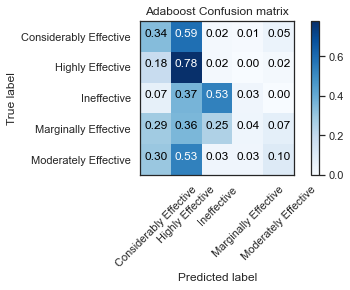

In [84]:
custom_plot_confusion_matrix(cmAdaboost,CLASSES,title='Adaboost Confusion matrix',normalize=True)

Normalized confusion matrix


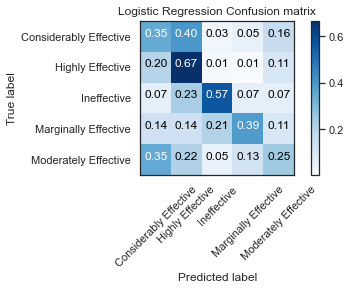

In [85]:
custom_plot_confusion_matrix(cmLogisticRegression ,CLASSES,title='Logistic Regression Confusion matrix',normalize=True)

Normalized confusion matrix


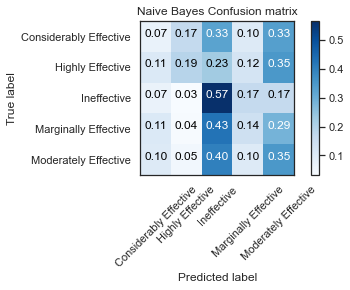

In [86]:
custom_plot_confusion_matrix(cmNaiveBayes,CLASSES,title='Naive Bayes Confusion matrix', normalize=True)

Normalized confusion matrix


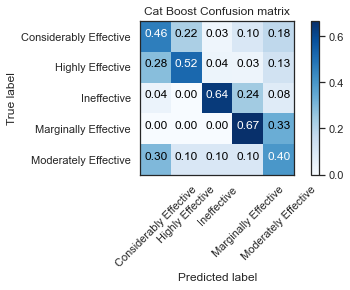

In [87]:
custom_plot_confusion_matrix(cmCatBoost,CLASSES,title='Cat Boost Confusion matrix', normalize=True)

# Summary : MutliClass

### Accuracy Scores

The overall accuracy of our models are below average : 

- Naive Bayes : 20 %
- Adaboost : 48 %
- Logistic Regression : 47 % 
- CatBoost : 51.3 %

### Reasons for low accuracy

- Imbalanced Classes
- Dataset may require different algorithms
- Further Hyper parameter tuning required

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_BIN_train, Y_BIN_validate = train_test_split(X,Y_BIN, test_size=0.2, random_state = 0)

done training 
Naive Bayes Accuracy 0.5331724969843185
Normalized confusion matrix


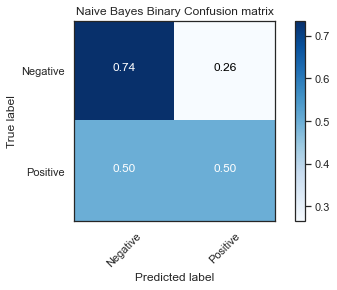

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
naiveBayesClassifier = GaussianNB()
naiveBayesClassifier.fit(X_train,Y_BIN_train)
Y_Prediction_Naive_Bayes_Binary = naiveBayesClassifier.predict(X_validate)
print("done training ")
accuracy_Naive_Bayes_Binary = accuracy_score(Y_BIN_validate,Y_Prediction_Naive_Bayes_Binary)
print("Naive Bayes Accuracy", accuracy_Naive_Bayes_Binary)
cmBinNaive = confusion_matrix(Y_BIN_validate,Y_Prediction_Naive_Bayes_Binary)
custom_plot_confusion_matrix(cmBinNaive, BIN_CLASSES ,title='Naive Bayes Binary Confusion matrix', normalize=True)

done
Logistic Regression Binary Accuracy 0.804583835946924
Normalized confusion matrix


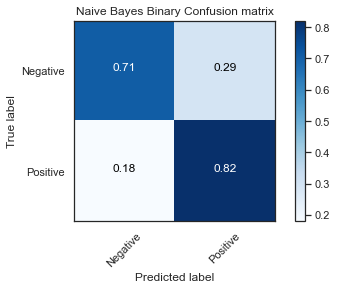

In [57]:
from sklearn.linear_model import LogisticRegression
logisticRegressionClassifier = LogisticRegression(class_weight="balanced", C=0.05,random_state=0)
logisticRegressionClassifier.fit(X_train, Y_BIN_train)
Y_Prediction_Logistic_Regression_binary = logisticRegressionClassifier.predict(X_validate)
print("done")
accuracy_logistic_regression_bin = accuracy_score(Y_BIN_validate,Y_Prediction_Logistic_Regression_binary)
print("Logistic Regression Binary Accuracy", accuracy_logistic_regression_bin)
cmBinLogistic = confusion_matrix(Y_BIN_validate,Y_Prediction_Logistic_Regression_binary)
custom_plot_confusion_matrix(cmBinLogistic, BIN_CLASSES ,title='Naive Bayes Binary Confusion matrix', normalize=True)

done
Adaboost Binary Accuracy 0.893848009650181
Normalized confusion matrix


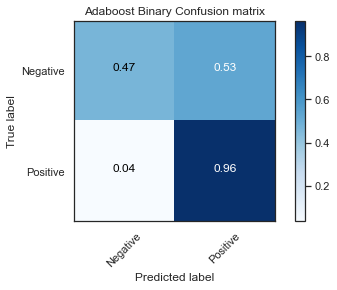

In [58]:
from sklearn.ensemble import AdaBoostClassifier

adaBoostClassifier = AdaBoostClassifier(n_estimators=100, random_state=0)
adaBoostClassifier.fit(X_train, Y_BIN_train)
Y_Prediction_adaBoostClassifier_BIN = adaBoostClassifier.predict(X_validate)
print("done")
accuracy_adaboost_bin = accuracy_score(Y_BIN_validate,Y_Prediction_adaBoostClassifier_BIN)
print("Adaboost Binary Accuracy", accuracy_adaboost_bin)
cmBinAdaboost = confusion_matrix(Y_BIN_validate,Y_Prediction_adaBoostClassifier_BIN)
custom_plot_confusion_matrix(cmBinAdaboost, BIN_CLASSES ,title='Adaboost Binary Confusion matrix', normalize=True)

0:	learn: 0.6622366	total: 3.98ms	remaining: 3.98s
1:	learn: 0.6290186	total: 7.59ms	remaining: 3.79s
2:	learn: 0.6043107	total: 11.2ms	remaining: 3.74s
3:	learn: 0.5775568	total: 15.2ms	remaining: 3.77s
4:	learn: 0.5536558	total: 19.1ms	remaining: 3.81s
5:	learn: 0.5327797	total: 22.8ms	remaining: 3.78s
6:	learn: 0.5142721	total: 26.7ms	remaining: 3.79s
7:	learn: 0.4978546	total: 30.8ms	remaining: 3.82s
8:	learn: 0.4830400	total: 34.8ms	remaining: 3.83s
9:	learn: 0.4701585	total: 38.6ms	remaining: 3.82s
10:	learn: 0.4557695	total: 42.5ms	remaining: 3.83s
11:	learn: 0.4430749	total: 46.6ms	remaining: 3.84s
12:	learn: 0.4341983	total: 50.7ms	remaining: 3.85s
13:	learn: 0.4263423	total: 54.5ms	remaining: 3.84s
14:	learn: 0.4170305	total: 58.4ms	remaining: 3.83s
15:	learn: 0.4106121	total: 63ms	remaining: 3.87s
16:	learn: 0.4062456	total: 66.8ms	remaining: 3.86s
17:	learn: 0.4009838	total: 70.9ms	remaining: 3.87s
18:	learn: 0.3963951	total: 74.7ms	remaining: 3.86s
19:	learn: 0.3900276	tot

179:	learn: 0.2882537	total: 696ms	remaining: 3.17s
180:	learn: 0.2878534	total: 701ms	remaining: 3.17s
181:	learn: 0.2877710	total: 706ms	remaining: 3.17s
182:	learn: 0.2875276	total: 710ms	remaining: 3.17s
183:	learn: 0.2874409	total: 714ms	remaining: 3.17s
184:	learn: 0.2870149	total: 718ms	remaining: 3.16s
185:	learn: 0.2866320	total: 721ms	remaining: 3.16s
186:	learn: 0.2865016	total: 725ms	remaining: 3.15s
187:	learn: 0.2864239	total: 728ms	remaining: 3.15s
188:	learn: 0.2863477	total: 732ms	remaining: 3.14s
189:	learn: 0.2862686	total: 736ms	remaining: 3.14s
190:	learn: 0.2857960	total: 740ms	remaining: 3.13s
191:	learn: 0.2856999	total: 743ms	remaining: 3.13s
192:	learn: 0.2853045	total: 747ms	remaining: 3.12s
193:	learn: 0.2849606	total: 751ms	remaining: 3.12s
194:	learn: 0.2848837	total: 754ms	remaining: 3.11s
195:	learn: 0.2846544	total: 758ms	remaining: 3.11s
196:	learn: 0.2842518	total: 762ms	remaining: 3.1s
197:	learn: 0.2841668	total: 765ms	remaining: 3.1s
198:	learn: 0.

364:	learn: 0.2507983	total: 1.4s	remaining: 2.43s
365:	learn: 0.2507593	total: 1.4s	remaining: 2.43s
366:	learn: 0.2505649	total: 1.41s	remaining: 2.42s
367:	learn: 0.2503229	total: 1.41s	remaining: 2.42s
368:	learn: 0.2501070	total: 1.41s	remaining: 2.42s
369:	learn: 0.2499211	total: 1.42s	remaining: 2.41s
370:	learn: 0.2498818	total: 1.42s	remaining: 2.41s
371:	learn: 0.2498401	total: 1.42s	remaining: 2.4s
372:	learn: 0.2495937	total: 1.43s	remaining: 2.4s
373:	learn: 0.2493142	total: 1.43s	remaining: 2.4s
374:	learn: 0.2491262	total: 1.44s	remaining: 2.39s
375:	learn: 0.2488585	total: 1.44s	remaining: 2.39s
376:	learn: 0.2485721	total: 1.44s	remaining: 2.38s
377:	learn: 0.2483964	total: 1.45s	remaining: 2.38s
378:	learn: 0.2481509	total: 1.45s	remaining: 2.38s
379:	learn: 0.2477562	total: 1.45s	remaining: 2.37s
380:	learn: 0.2475173	total: 1.46s	remaining: 2.37s
381:	learn: 0.2473202	total: 1.46s	remaining: 2.36s
382:	learn: 0.2471656	total: 1.46s	remaining: 2.36s
383:	learn: 0.247

550:	learn: 0.2212602	total: 2.1s	remaining: 1.71s
551:	learn: 0.2212085	total: 2.1s	remaining: 1.71s
552:	learn: 0.2208167	total: 2.1s	remaining: 1.7s
553:	learn: 0.2207469	total: 2.11s	remaining: 1.7s
554:	learn: 0.2207177	total: 2.11s	remaining: 1.69s
555:	learn: 0.2205216	total: 2.12s	remaining: 1.69s
556:	learn: 0.2203885	total: 2.12s	remaining: 1.69s
557:	learn: 0.2201231	total: 2.12s	remaining: 1.68s
558:	learn: 0.2200764	total: 2.13s	remaining: 1.68s
559:	learn: 0.2198900	total: 2.13s	remaining: 1.68s
560:	learn: 0.2197536	total: 2.14s	remaining: 1.67s
561:	learn: 0.2195763	total: 2.14s	remaining: 1.67s
562:	learn: 0.2195492	total: 2.14s	remaining: 1.66s
563:	learn: 0.2192890	total: 2.15s	remaining: 1.66s
564:	learn: 0.2190461	total: 2.15s	remaining: 1.66s
565:	learn: 0.2188492	total: 2.15s	remaining: 1.65s
566:	learn: 0.2187424	total: 2.16s	remaining: 1.65s
567:	learn: 0.2184831	total: 2.16s	remaining: 1.65s
568:	learn: 0.2184524	total: 2.17s	remaining: 1.64s
569:	learn: 0.218

741:	learn: 0.1954426	total: 2.8s	remaining: 974ms
742:	learn: 0.1952934	total: 2.8s	remaining: 970ms
743:	learn: 0.1951851	total: 2.81s	remaining: 966ms
744:	learn: 0.1951511	total: 2.81s	remaining: 963ms
745:	learn: 0.1949969	total: 2.82s	remaining: 959ms
746:	learn: 0.1949725	total: 2.82s	remaining: 955ms
747:	learn: 0.1948367	total: 2.82s	remaining: 951ms
748:	learn: 0.1946477	total: 2.83s	remaining: 947ms
749:	learn: 0.1946303	total: 2.83s	remaining: 944ms
750:	learn: 0.1945426	total: 2.83s	remaining: 940ms
751:	learn: 0.1944869	total: 2.84s	remaining: 936ms
752:	learn: 0.1941810	total: 2.84s	remaining: 932ms
753:	learn: 0.1940225	total: 2.85s	remaining: 928ms
754:	learn: 0.1939152	total: 2.85s	remaining: 925ms
755:	learn: 0.1938952	total: 2.85s	remaining: 921ms
756:	learn: 0.1937522	total: 2.86s	remaining: 917ms
757:	learn: 0.1936539	total: 2.86s	remaining: 913ms
758:	learn: 0.1935666	total: 2.86s	remaining: 909ms
759:	learn: 0.1933570	total: 2.87s	remaining: 905ms
760:	learn: 0.

932:	learn: 0.1764325	total: 3.5s	remaining: 251ms
933:	learn: 0.1763206	total: 3.5s	remaining: 248ms
934:	learn: 0.1762783	total: 3.51s	remaining: 244ms
935:	learn: 0.1762116	total: 3.51s	remaining: 240ms
936:	learn: 0.1760001	total: 3.52s	remaining: 236ms
937:	learn: 0.1759854	total: 3.52s	remaining: 233ms
938:	learn: 0.1759069	total: 3.52s	remaining: 229ms
939:	learn: 0.1758496	total: 3.53s	remaining: 225ms
940:	learn: 0.1756220	total: 3.53s	remaining: 221ms
941:	learn: 0.1754833	total: 3.53s	remaining: 218ms
942:	learn: 0.1753901	total: 3.54s	remaining: 214ms
943:	learn: 0.1752802	total: 3.54s	remaining: 210ms
944:	learn: 0.1751961	total: 3.54s	remaining: 206ms
945:	learn: 0.1751400	total: 3.55s	remaining: 203ms
946:	learn: 0.1749166	total: 3.55s	remaining: 199ms
947:	learn: 0.1748292	total: 3.56s	remaining: 195ms
948:	learn: 0.1747114	total: 3.56s	remaining: 191ms
949:	learn: 0.1746933	total: 3.56s	remaining: 188ms
950:	learn: 0.1746036	total: 3.57s	remaining: 184ms
951:	learn: 0.

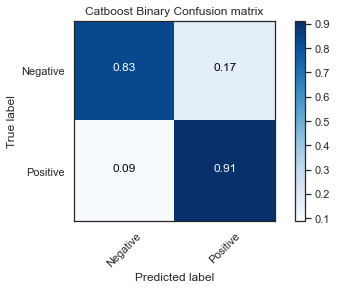

In [60]:
from catboost import Pool, CatBoostClassifier
train_dataset_catboost_bin = Pool(data = X_train,
                     label = Y_BIN_train)
test_dataset_catboost_bin = Pool(data = X_validate,
                    label = Y_BIN_validate)
modelCatboost  = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=4)
modelCatboost.fit(train_dataset_catboost_bin)
print("done")
Y_Prediction_catBoostClassifier_bin = modelCatboost.predict(X_validate)
catboostAccuracyBin = accuracy_score(Y_Prediction_catBoostClassifier_bin, Y_BIN_validate )
print("catboost accuracy binary", catboostAccuracyBin)
cmBinCatboost = confusion_matrix(Y_Prediction_catBoostClassifier_bin, Y_BIN_validate)
custom_plot_confusion_matrix(cmBinCatboost, BIN_CLASSES ,title='Catboost Binary Confusion matrix', normalize=True)

# Summary : Binary Class

### Accuracy Scores

The overall accuracy of our models are below average : 

- Naive Bayes : 53 %
- Adaboost : 89 %
- Logistic Regression : 80 % 
- CatBoost : 90.7 %

### Reasons for good accuracy

- Binary Classes
- Algorithms suites well to use case